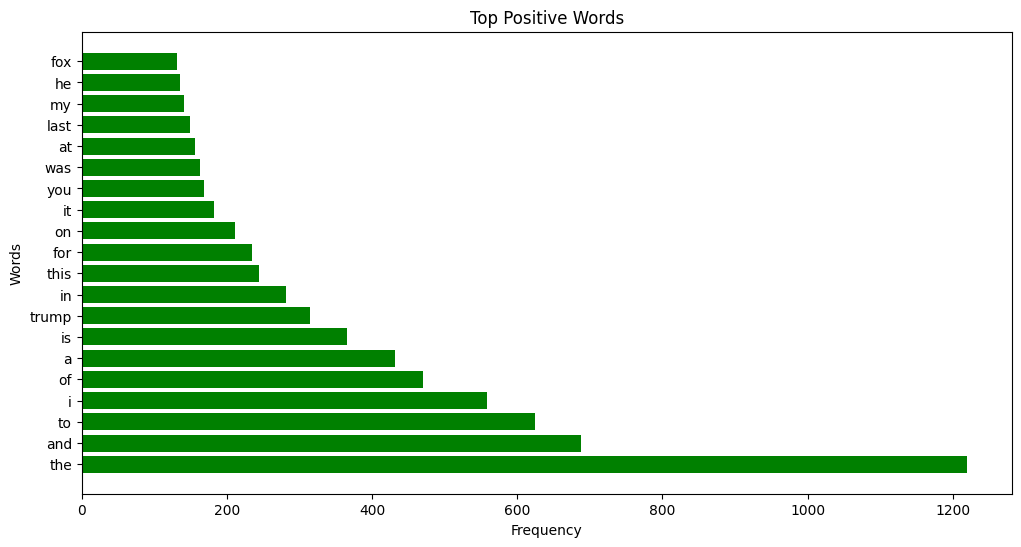

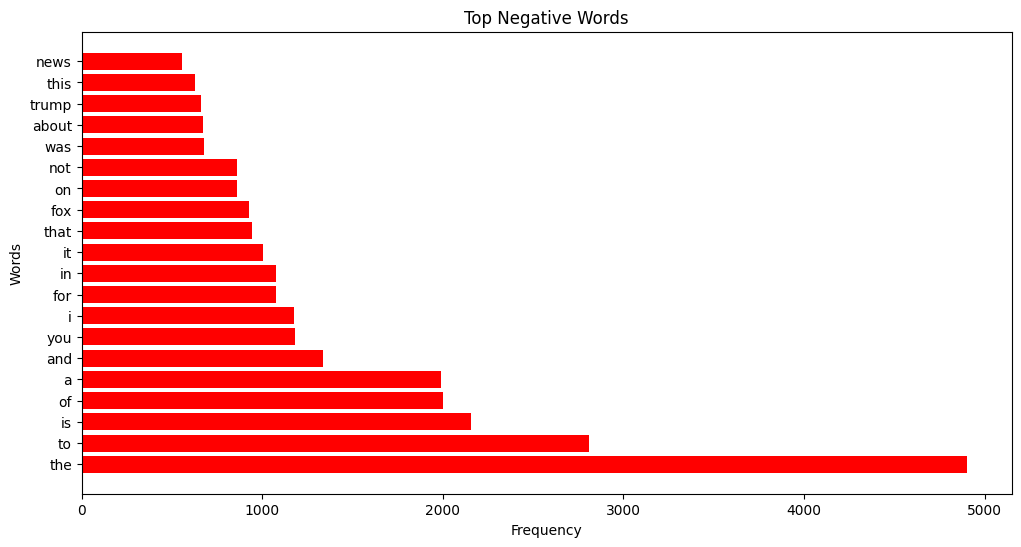

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
import matplotlib.pyplot as plt

data = pd.read_csv('Sentiment.csv')
data = data[['text', 'sentiment']]

train, test = train_test_split(data, test_size=0.1)
train = train[train.sentiment != "Neutral"]

train_pos = train[train['sentiment'] == 'Positive']
train_pos = train_pos['text']
train_neg = train[train['sentiment'] == 'Negative']
train_neg = train_neg['text']

def get_word_frequency(data):
    words = ' '.join(data)
    cleaned_words = [word.lower() for word in words.split()
                    if 'http' not in word
                    and not word.startswith('@')
                    and not word.startswith('#')
                    and word != 'RT'
                    and word.isalpha()]  # Only keep alphabetic words
    word_freq = nltk.FreqDist(cleaned_words)
    return word_freq

pos_word_freq = get_word_frequency(train_pos)
neg_word_freq = get_word_frequency(train_neg)

# Plot the most common words in positive and negative tweets
num_words_to_plot = 20

# Positive words
pos_common_words = pos_word_freq.most_common(num_words_to_plot)
pos_words, pos_freqs = zip(*pos_common_words)

plt.figure(figsize=(12, 6))
plt.barh(pos_words, pos_freqs, color='green')
plt.title('Top Positive Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

# Negative words
neg_common_words = neg_word_freq.most_common(num_words_to_plot)
neg_words, neg_freqs = zip(*neg_common_words)

plt.figure(figsize=(12, 6))
plt.barh(neg_words, neg_freqs, color='red')
plt.title('Top Negative Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

